In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [26]:
(x_train,_),(x_test, _) = mnist.load_data()

In [27]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [28]:
model = Sequential()
model.add(Input(shape=(784,))) # Input
model.add(Dense(350, activation="relu")) # HL
model.add(Dense(100, activation="relu")) # Code
model.add(Dense(350, activation="relu")) # HL
model.add(Dense(784)) # Output

In [29]:
model.compile(optimizer="adam",
              loss="mean_squared_error")

In [30]:
model.fit(x=x_train, 
          y=x_train,
          epochs=50,
          batch_size=1000,
          validation_data = (x_test, x_test))

Epoch 1/50
60/60 [==============================] - 2s 40ms/step - loss: 3678.3547 - val_loss: 2182.9600
Epoch 2/50
60/60 [==============================] - 2s 38ms/step - loss: 1668.8956 - val_loss: 1283.4760
Epoch 3/50
60/60 [==============================] - 2s 38ms/step - loss: 1155.6670 - val_loss: 1010.6626
Epoch 4/50
60/60 [==============================] - 2s 38ms/step - loss: 959.6678 - val_loss: 879.5154
Epoch 5/50
60/60 [==============================] - 2s 37ms/step - loss: 860.0527 - val_loss: 800.4016
Epoch 6/50
60/60 [==============================] - 2s 41ms/step - loss: 801.2492 - val_loss: 756.4766
Epoch 7/50
60/60 [==============================] - 2s 41ms/step - loss: 761.5110 - val_loss: 725.2009
Epoch 8/50
60/60 [==============================] - 2s 38ms/step - loss: 729.6742 - val_loss: 709.4338
Epoch 9/50
60/60 [==============================] - 2s 39ms/step - loss: 707.7084 - val_loss: 678.5705
Epoch 10/50
60/60 [==============================] - 2s 39ms/step -

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               79184     
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

### Encoder

In [12]:
encoder = Sequential()
for layer in model.layers[:1]:
    encoder.add(layer)

In [14]:
encoder.build(input_shape=(None,784))

In [15]:
encoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               78500     
Total params: 78,500
Trainable params: 78,500
Non-trainable params: 0
_________________________________________________________________


### Decoder

In [16]:
decoder = Sequential()
for layer in model.layers[1:]:
    decoder.add(layer)

decoder.build(input_shape=(None,100))
decoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               79184     
Total params: 79,184
Trainable params: 79,184
Non-trainable params: 0
_________________________________________________________________


### Testing Encoder and Decoder

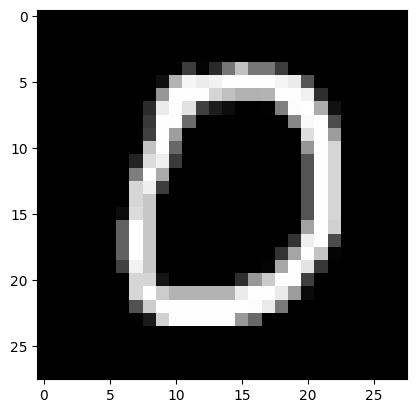

In [19]:
# Original Image
plt.imshow(x_test[10].reshape(28,28), cmap="gray")
plt.show()

In [21]:
# Get Compressed Representation

code = encoder.predict(x_test)
code[10].shape

(100,)

In [22]:
# De Compress this Representation using Decoder

x_test_reconstructed = decoder.predict(code)

In [24]:
x_test_reconstructed[10].shape

(784,)

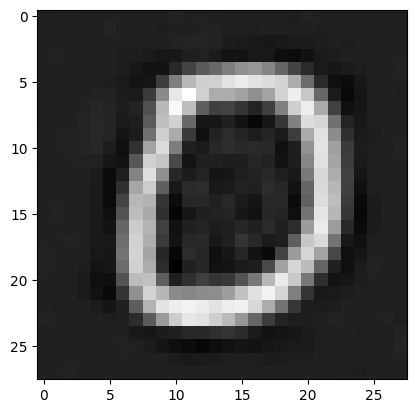

In [25]:
# Reconstructed Image
plt.imshow(x_test_reconstructed[10].reshape(28,28), cmap="gray")
plt.show()